# Streaming Responses from the Workflow/Graph

In [3]:
from typing import TypedDict
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.messages import AIMessage,SystemMessage,HumanMessage,AnyMessage,RemoveMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from dotenv import load_dotenv
from langchain_core.runnables import RunnableConfig
from langgraph.checkpoint.sqlite import SqliteSaver

load_dotenv()

True

Creating the SQLIte Connection

In [ ]:
import os
import sqlite3

os.makedirs("db", exist_ok=True)

path = os.path.join(os.getcwd(), "db", "streaming.db")
connection = sqlite3.connect(path)

Using the Code from the previously created chat history

In [11]:
llm_model = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

memory = SqliteSaver(connection)


def call_model(state: MessagesState) -> MessagesState:
    system_message = SystemMessage(
        "You are a helpful Assistant. Which replies to user queries"
    )
    response = llm_model.invoke([system_message] + state["messages"])
    return {"messages": [response]}


graph = StateGraph(MessagesState)
graph.add_node("model", call_model)

graph.add_edge(START, "model")
graph.add_edge("model", END)

agent = graph.compile(memory, name="simple_agent")

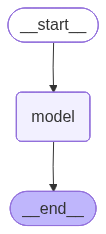

In [13]:
from IPython.display import display,Image

display(Image(agent.get_graph().draw_mermaid_png()))

Invoking the Agent or Graph with Streaming

In [ ]:
config = {"configurable": {"thread_id": "1"}}

# Start conversation
for chunk in agent.stream({"messages": [HumanMessage(content="hi! I'm user")]}, config, stream_mode="updates"):
    print(chunk)